# Bank Churn 분석

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

sns.set()
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [2]:
!curl -L https://bit.ly/2MvLrmr -o bank.csv

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   143  100   143    0     0    442      0 --:--:-- --:--:-- --:--:--   441
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
  0     0    0     0    0     0      0      0 --:--:--  0:00:01 --:--:--     0
100  668k  100  668k    0     0   369k      0  0:00:01  0:00:01 --:--:-- 1087k


In [3]:
data = pd.read_csv('bank.csv')

## 특성
- CreditScore : 신용점수
- Tenure : 장기대출
- Balance : 잔고
- NumOfProducts : 은행 계좌 및 제휴 제품 수
- HasCrCard : 은행 신용카드 보유 여부
- IsActiveMember : 활성 고객 여부
- EstimatedSalary : 예상 연봉
- Exited : 이탈 여부

In [4]:
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


## 탐색적분석

- 이탈했으나, 잔고가 남아있는 고객이 존재한다.
- 활성화 고객(IsActiveMember)이 된다는 것은 무엇을 의미하는가?

## Gender 성별

Male      5457
Female    4543
Name: Gender, dtype: int64
Male      0.5457
Female    0.4543
Name: Gender, dtype: float64


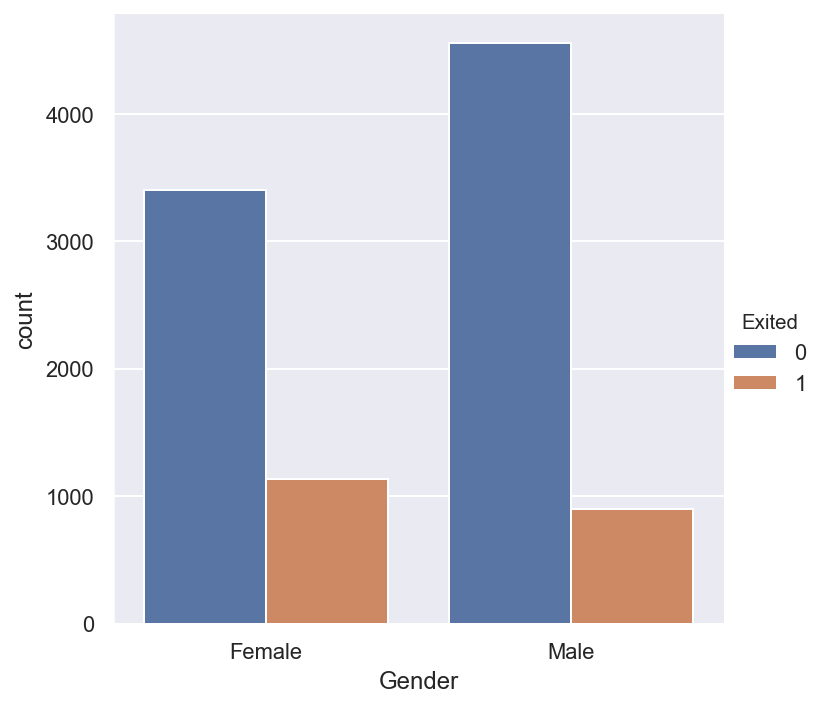

In [6]:
print(data.Gender.value_counts())
print(data.Gender.value_counts(normalize=True))
sns.catplot(kind='count', data=data, x='Gender', hue="Exited")

- 여성 고객의 이탈 비율이 남성 고객의 이탈 비율보다 크다.

## Age

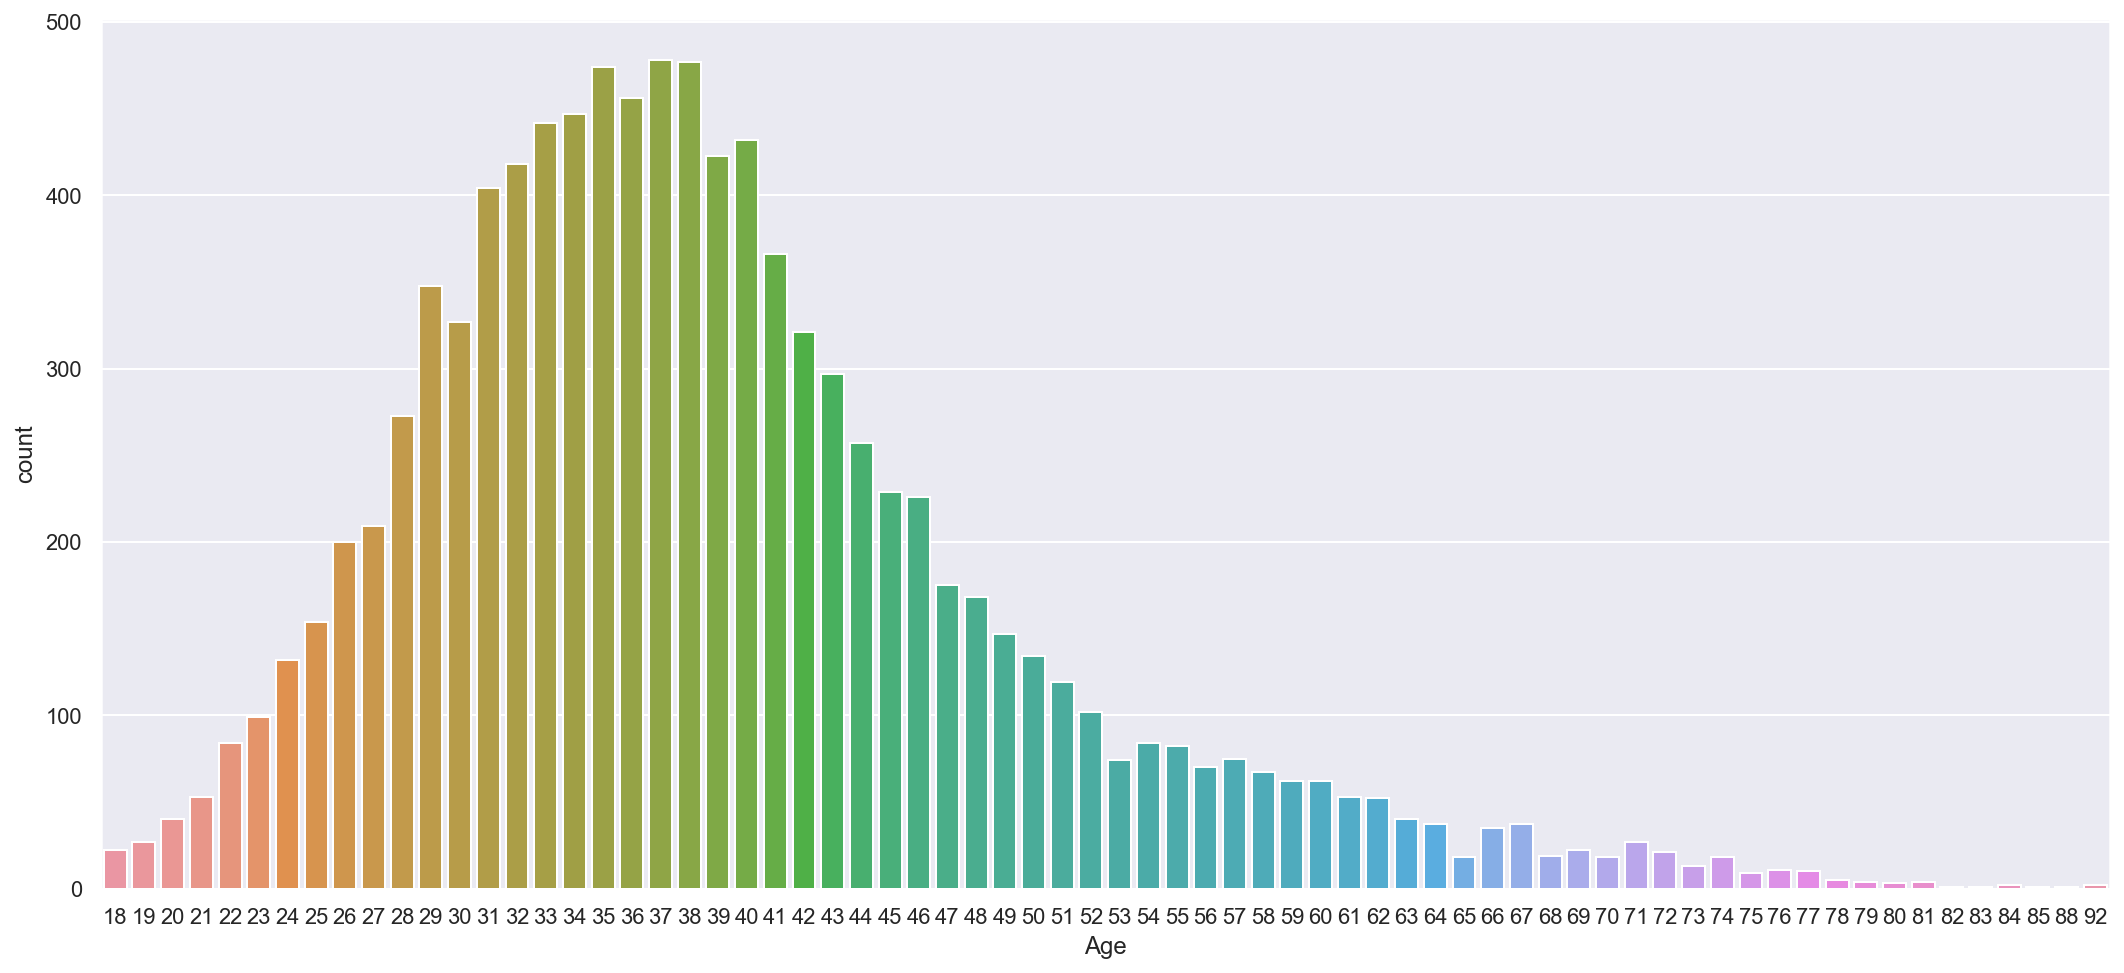

In [7]:
plt.figure(figsize=(18, 8))
sns.countplot(x=data.Age, data=data)

- 데이터에 존재하는 고객의 대부분이 30대이다.

## Geography

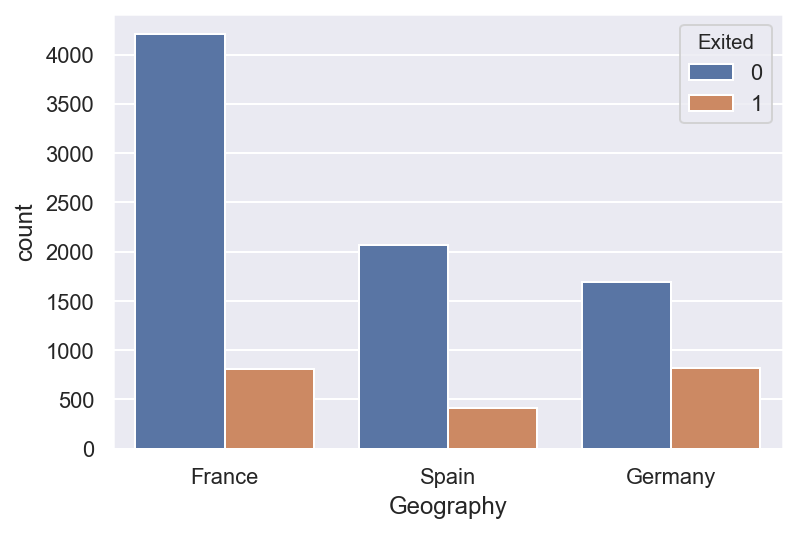

In [8]:
sns.countplot(x='Geography', hue = 'Exited',data = data)

## Tenure

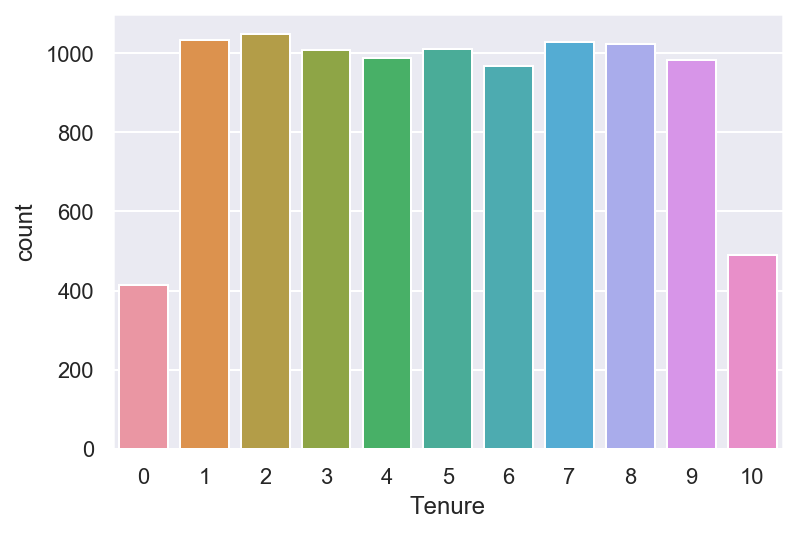

In [9]:
# plt.figure(figsize=(14, 8))
sns.countplot(x='Tenure', data=data)

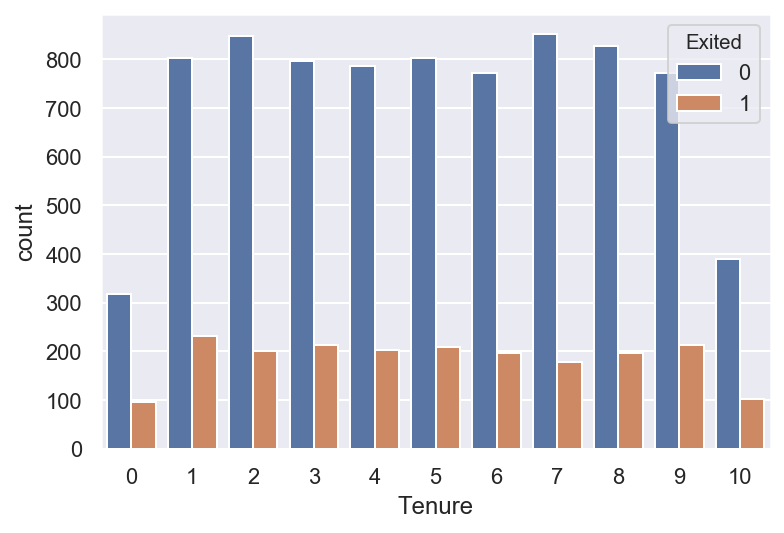

In [10]:
# plt.figure(figsize=(14, 8))
sns.countplot(x='Tenure', data=data, hue="Exited")

## CreditScore

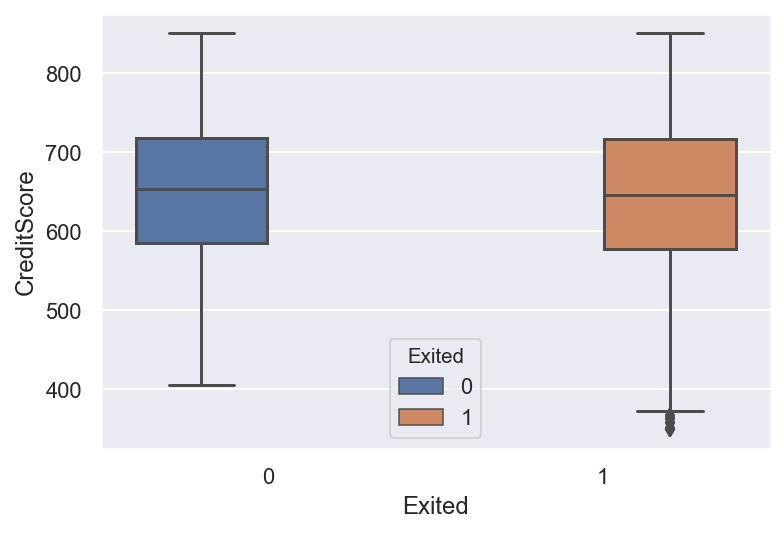

In [11]:
sns.boxplot(y='CreditScore',x = 'Exited', hue = 'Exited',data = data)

- 신용등급의 분포는 이탈 고객과 잔류 고객 간에 유의한 차이가 존재하지 않음.

## Balance

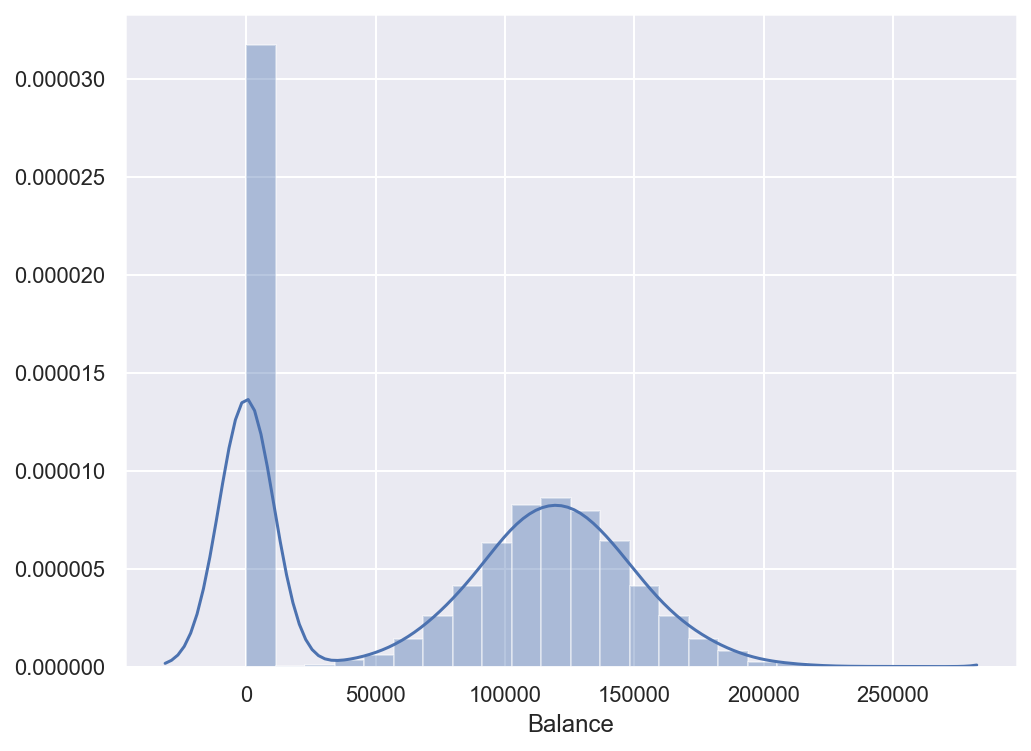

In [12]:
plt.figure(figsize=(8, 6))
sns.distplot(data.Balance);

count      7963.000000
mean      72745.296779
std       62848.040701
min           0.000000
25%           0.000000
50%       92072.680000
75%      126410.280000
max      221532.800000
Name: Balance, dtype: float64
count      2037.000000
mean      91108.539337
std       58360.794816
min           0.000000
25%       38340.020000
50%      109349.290000
75%      131433.330000
max      250898.090000
Name: Balance, dtype: float64


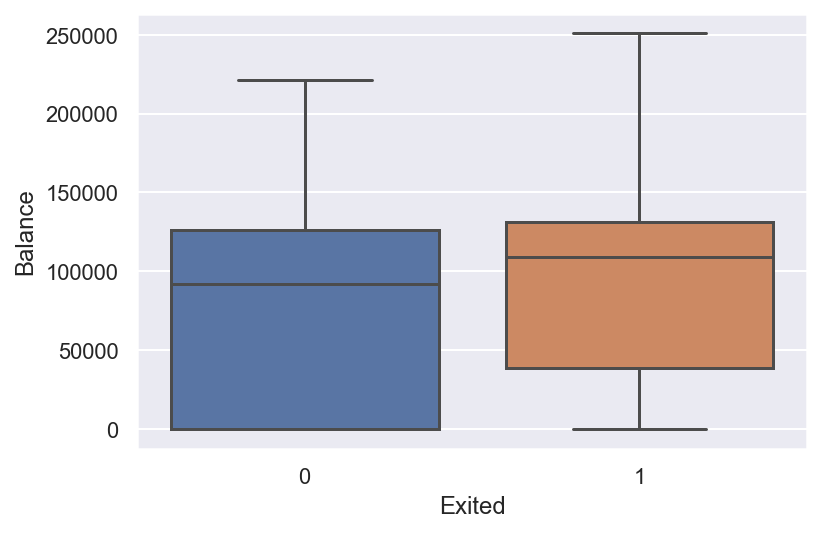

In [13]:
print(data[data['Exited'] == 0]['Balance'].describe())
print(data[data['Exited'] == 1]['Balance'].describe())
# plt.figure(figsize=(15, 8))
sns.boxplot(x='Exited', y='Balance', data=data)

## NumOfProducts

1    5084
2    4590
3     266
4      60
Name: NumOfProducts, dtype: int64
1    0.5084
2    0.4590
3    0.0266
4    0.0060
Name: NumOfProducts, dtype: float64


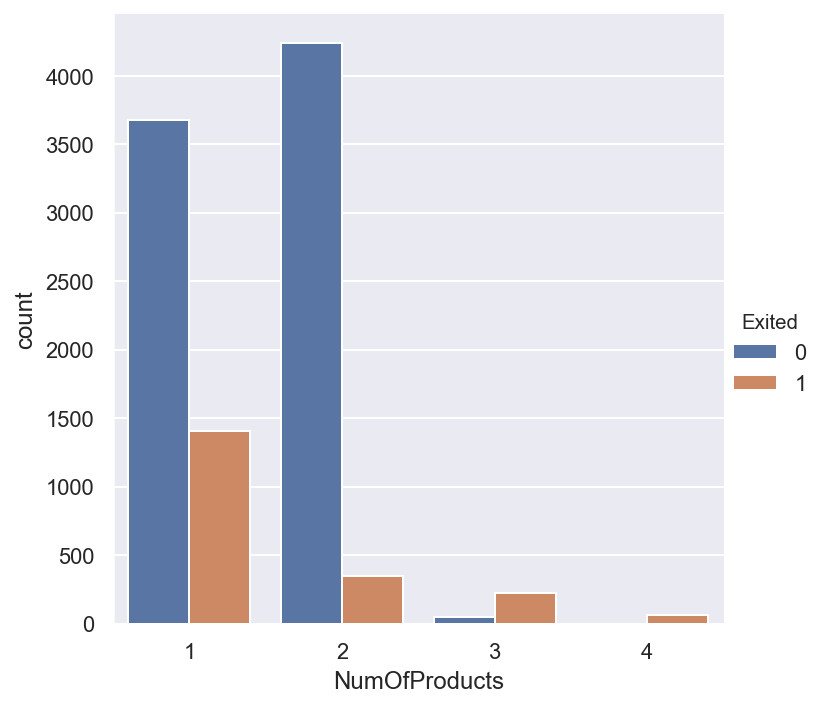

In [14]:
print(data.NumOfProducts.value_counts())
print(data.NumOfProducts.value_counts(normalize=True))
sns.catplot(kind='count', data=data, x='NumOfProducts', hue="Exited")

- 계좌 보유 수에 따른 이탈 : 은행 계좌 및 제휴 제품 수가 3개 이상이면 이탈 고객

## HasCrCard

1    7055
0    2945
Name: HasCrCard, dtype: int64
1    0.7055
0    0.2945
Name: HasCrCard, dtype: float64


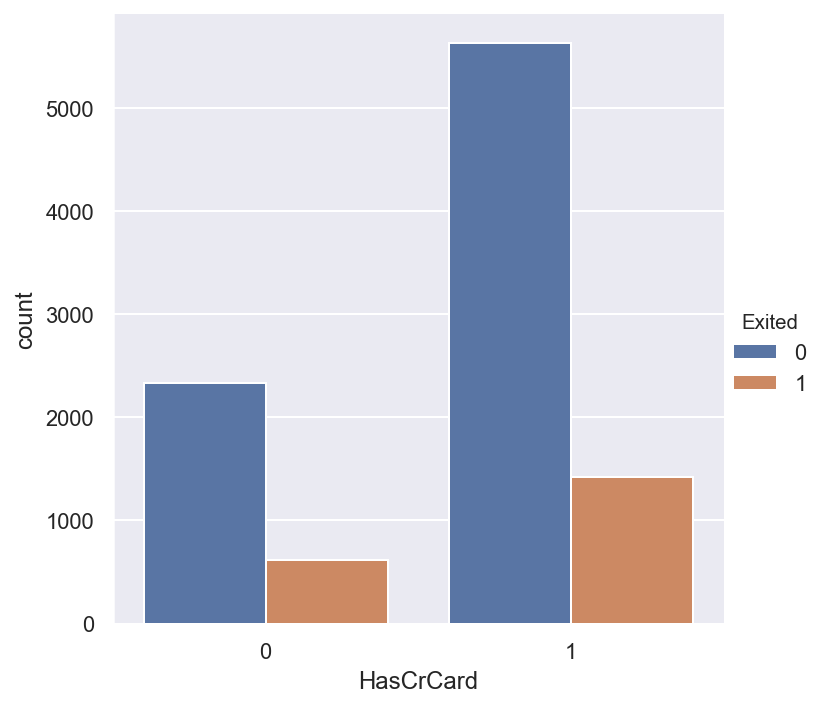

In [15]:
print(data.HasCrCard.value_counts())
print(data.HasCrCard.value_counts(normalize=True))
sns.catplot(kind='count', data=data, x='HasCrCard', hue="Exited")

- 이탈 고객의 대부분은 신용카드를 가진 고객이다.
- 대부분의 고객들이 신용카드를 가지고 있다는 것을 고려하면 이것은 단순한 우연의 일치일 수도 있다.

## IsActiveMember

1    5151
0    4849
Name: IsActiveMember, dtype: int64
1    0.5151
0    0.4849
Name: IsActiveMember, dtype: float64


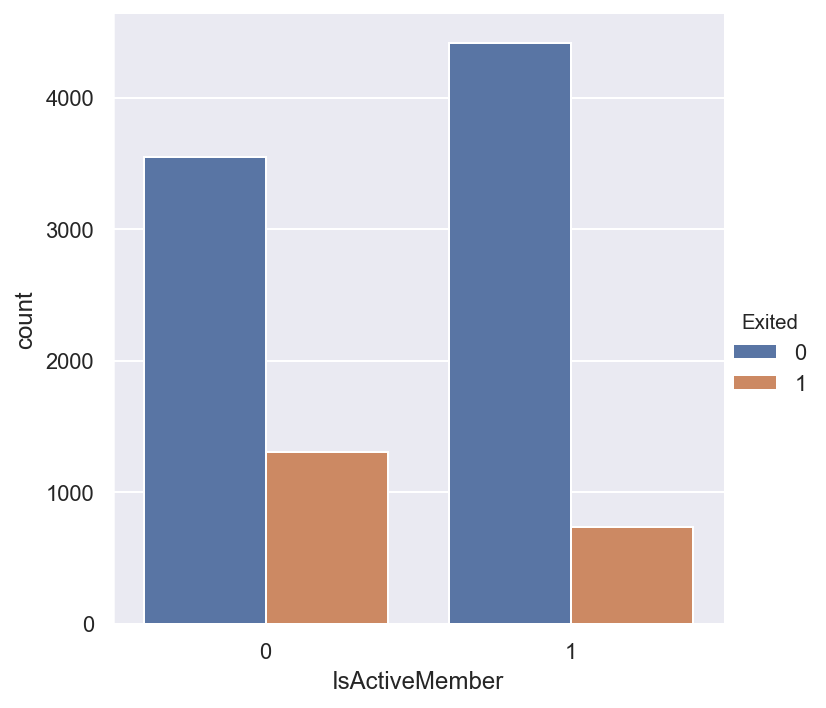

In [16]:
print(data.IsActiveMember.value_counts())
print(data.IsActiveMember.value_counts(normalize=True))
sns.catplot(kind='count', data=data, x='IsActiveMember', hue="Exited")

- 활성화가 되어있지 않은 고객들이 활성화 고객보다 더 높은 비율로 이탈한다.
- 활성화가 되어있지 않은 고객의 비율이 상당히 높다. 이는 고객 이탈에 영향을 미칠 것이기 때문에 은행은 이 그룹을 활성화 고객으로 전환시키기 위해 별도의 프로그램을 시행할 수 있다는 것을 암시한다.

## EstimatedSalary

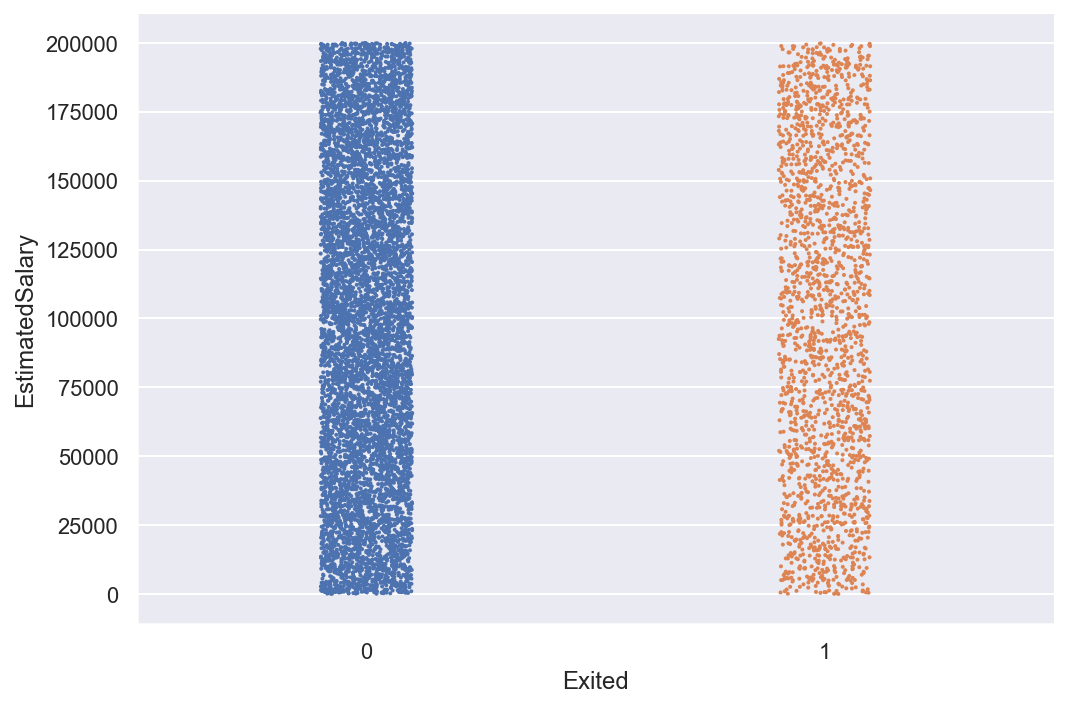

In [17]:
sns.catplot(x='Exited', y='EstimatedSalary', s=2, data=data, aspect=1.5)

count     10000.000000
mean     100090.239881
std       57510.492818
min          11.580000
25%       51002.110000
50%      100193.915000
75%      149388.247500
max      199992.480000
Name: EstimatedSalary, dtype: float64


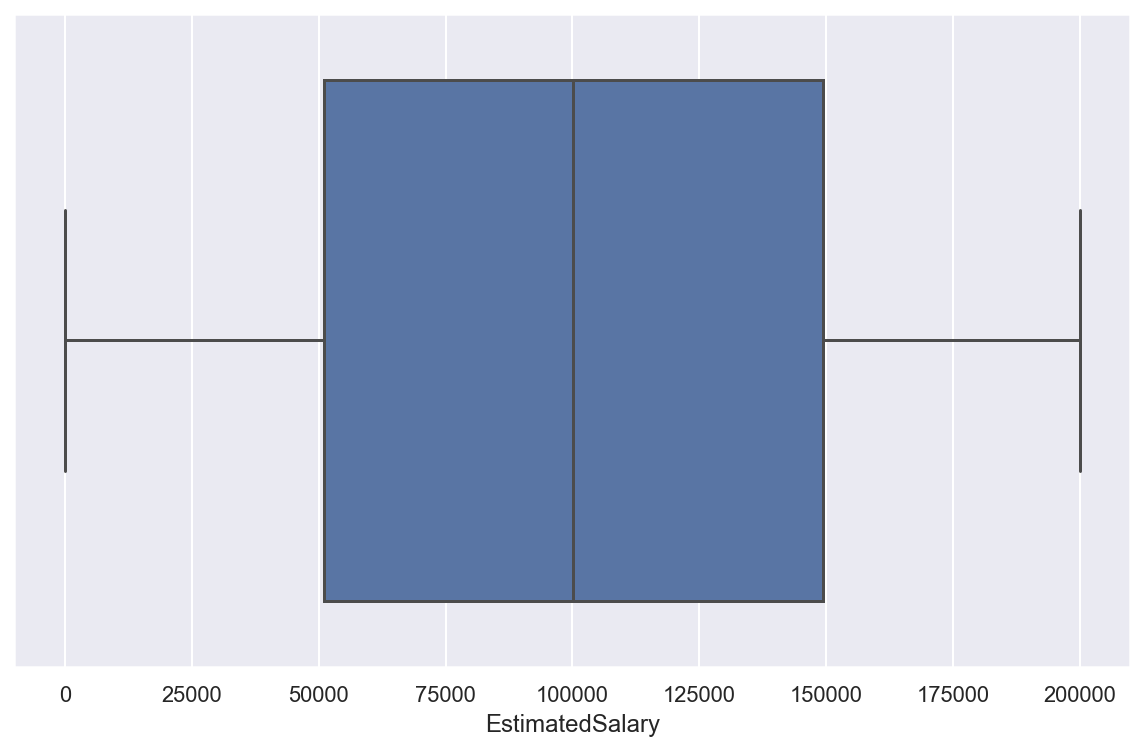

In [18]:
print(data.EstimatedSalary.describe())
plt.figure(figsize=(10, 6))
sns.boxplot(x='EstimatedSalary', data=data)

- 연봉 범위 : 11.58 ~ 199,992.48

# **Preprocessing**

- 고객 이름, 인덱스, ID는 분류에 필요가 없으므로 제거
- 고객 이탈을 분류하는 문제이므로 Exited 특성은 target 변수로 사용

In [19]:
target = data['Exited']
data.drop(['RowNumber', 'CustomerId', 'Surname', 'Exited'], axis=1, inplace=True)

# 데이터 전처리
## 수치로 구성된 특성 추출

In [20]:
num_list = list(data.columns)
print(num_list)
num_list.remove('Geography')
num_list.remove('Gender')
num_list.remove('NumOfProducts')
num_list.remove('HasCrCard')
num_list.remove('IsActiveMember')
numeric = num_list
print(numeric)

['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary']
['CreditScore', 'Age', 'Tenure', 'Balance', 'EstimatedSalary']


In [21]:
data[numeric].head()

,CreditScore,Age,Tenure,Balance,EstimatedSalary
0,619,42,2,0.00,101348.88
1,608,41,1,83807.86,112542.58
2,502,42,8,159660.80,113931.57
3,699,39,1,0.00,93826.63
4,850,43,2,125510.82,79084.10


In [22]:
data

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10
...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77
9997,709,France,Female,36,7,0.00,1,0,1,42085.58
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52


## 범주형 변수 변환(get_dummies)

In [23]:
data = pd.get_dummies(data, drop_first=True)

In [24]:
data.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,1,0


## 수치형 변수 정규화

In [25]:
scaler = StandardScaler()
scaler.fit(data[numeric])
data[numeric] = scaler.transform(data[numeric])

In [26]:
data.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
0,-0.326221,0.293517,-1.041760,-1.225848,1,1,1,0.021886,0,0,0
1,-0.440036,0.198164,-1.387538,0.117350,1,0,1,0.216534,0,1,0
2,-1.536794,0.293517,1.032908,1.333053,3,1,0,0.240687,0,0,0
3,0.501521,0.007457,-1.387538,-1.225848,2,0,0,-0.108918,0,0,0
4,2.063884,0.388871,-1.041760,0.785728,1,1,1,-0.365276,0,1,0


## 데이터 분리(train, test, valid)

In [27]:
data, features_test, target, target_test = train_test_split(data, target, test_size=0.2, random_state=42)

In [28]:
features_train, features_valid, target_train, target_valid = train_test_split(data, target, test_size=0.25, random_state=42)

In [29]:
features_train.shape

(6000, 11)

In [30]:
features_valid.shape

(2000, 11)

# **Model Design**

## 로지스틱 회귀

In [31]:
model_lr = LogisticRegression()
model_lr.fit(features_train, target_train)
prediction = model_lr.predict(features_valid)

In [32]:
f1_score(target_valid, prediction)

0.3115942028985507

In [34]:
proba_lr = model_lr.predict_proba(features_valid)
proba_lr = proba_lr[:, 1]
auc_roc = roc_auc_score(target_valid, proba_lr)
print(auc_roc)

0.7836370266282797


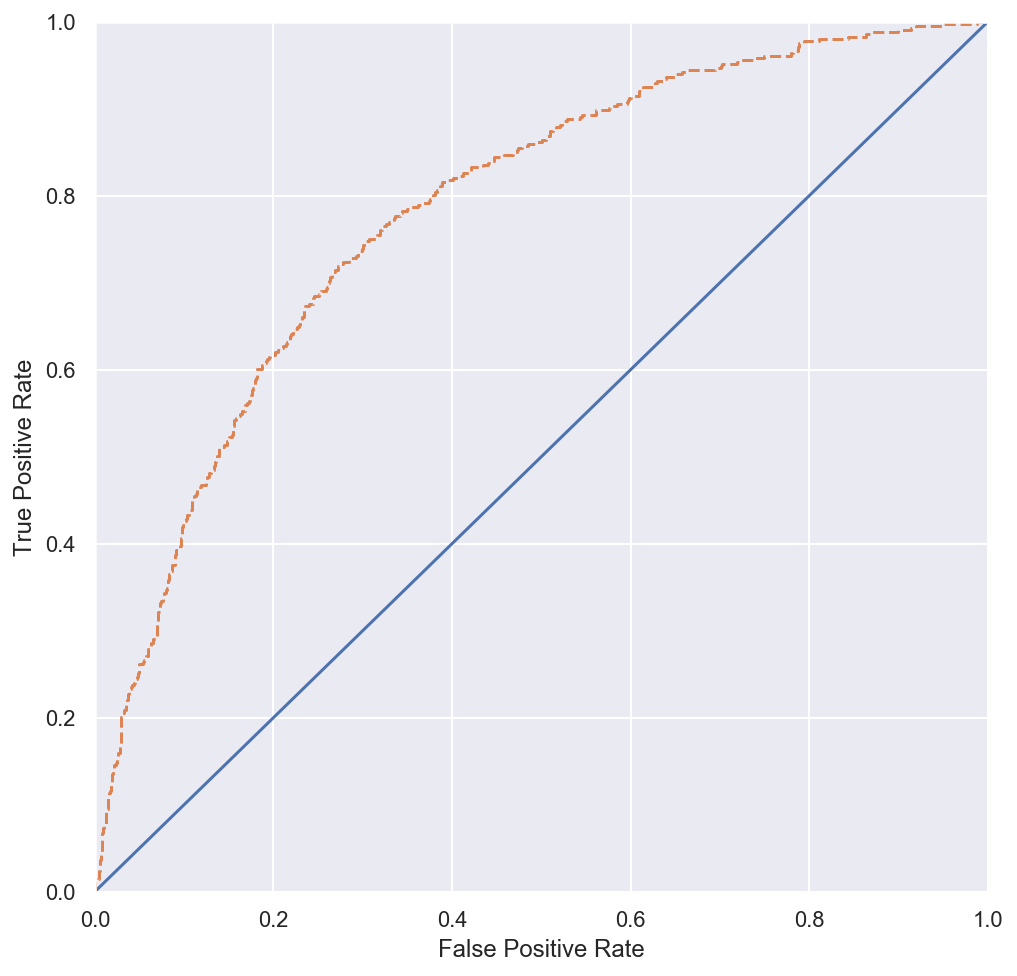

In [35]:
fpr_lr, tpr_lr, thresholds_lr = roc_curve(target_valid, proba_lr)

plt.figure(figsize=(8, 8))
plt.plot([0, 1], [0, 1])
plt.plot(fpr_lr, tpr_lr, linestyle='--')

plt.xlim([0, 1])
plt.ylim([0, 1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.show()

## 그래디언트 부스팅

In [36]:
for i in range(1, 502, 100):
    model = GradientBoostingClassifier(n_estimators=i, random_state=42)
    model.fit(features_train, target_train)
    print(i, model.score(features_valid, target_valid))

1 0.7935
101 0.8645
201 0.864
301 0.8645
401 0.8625
501 0.8625


In [37]:
model_gbc = GradientBoostingClassifier(n_estimators=200, random_state=42)
model_gbc.fit(features_train, target_train)
print(model_gbc.score(features_train, target_train))
print(model_gbc.score(features_valid, target_valid))

0.8856666666666667
0.863


In [38]:
prediction = model_gbc.predict(features_valid)
f1_score(target_valid, prediction)

0.5994152046783625

In [39]:
proba_gbc = model_gbc.predict_proba(features_valid)
proba_gbc = proba_gbc[:, 1]
auc_roc = roc_auc_score(target_valid, proba_gbc)
print(auc_roc)

0.8660453960828829


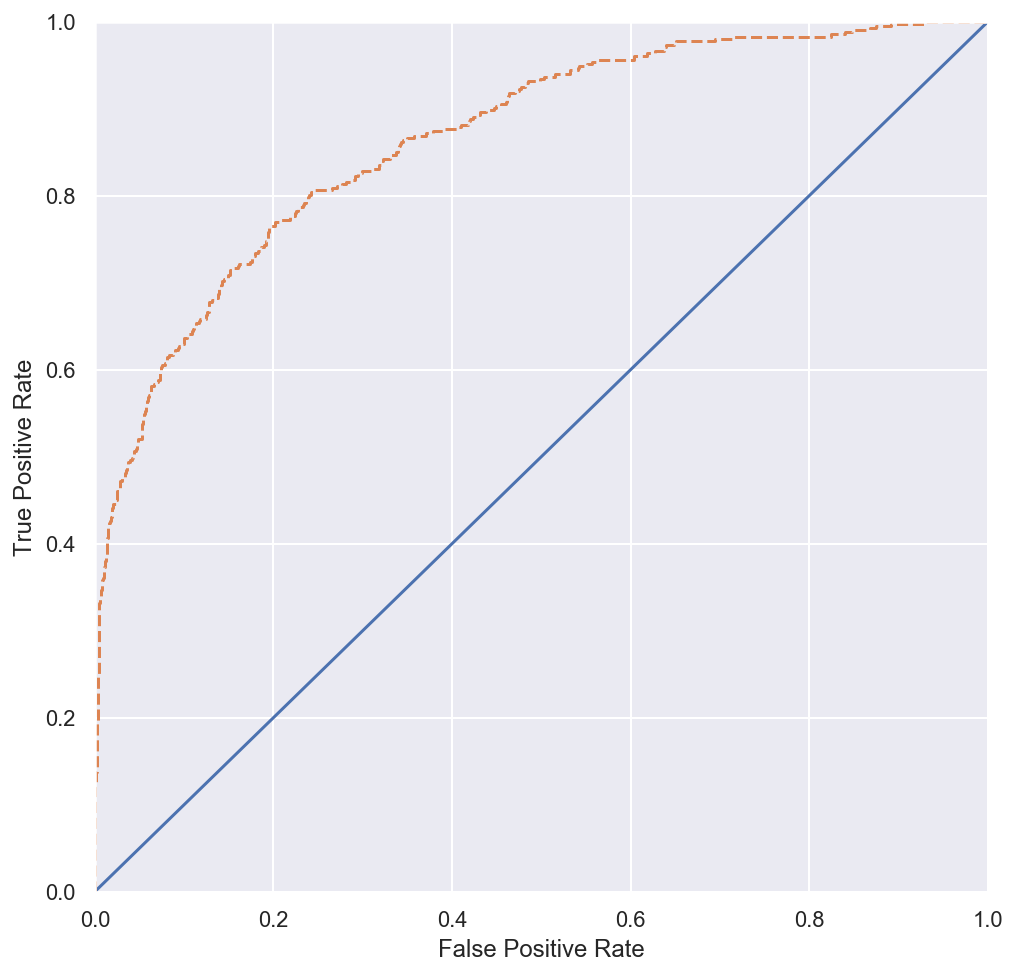

In [40]:
fpr_gbc, tpr_gbc, thresholds_gbc = roc_curve(target_valid, proba_gbc)
plt.figure(figsize=(8, 8))
plt.plot([0, 1], [0, 1])
plt.plot(fpr_gbc, tpr_gbc, linestyle='--')

plt.xlim([0, 1])
plt.ylim([0, 1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.show()

## 랜덤 포레스트

In [41]:
for i in range(1, 502, 100):
    model = RandomForestClassifier(n_estimators=i, random_state=42)
    model.fit(features_train, target_train)
    print(i, model.score(features_valid, target_valid))

1 0.791
101 0.8645
201 0.8635
301 0.867
401 0.867
501 0.8675


In [42]:
model_rf = RandomForestClassifier(n_estimators=300, random_state=42)
model_rf.fit(features_train, target_train)
print(model_rf.score(features_train, target_train))
print(model_rf.score(features_valid, target_valid))

1.0
0.867


In [43]:
prediction = model_rf.predict(features_valid)
f1_score(target_valid, prediction)

0.606508875739645

In [44]:
proba_rf = model_rf.predict_proba(features_valid)
proba_rf = proba_rf[:, 1]
auc_roc = roc_auc_score(target_valid, proba_rf)
print(auc_roc)

0.8596724903155329


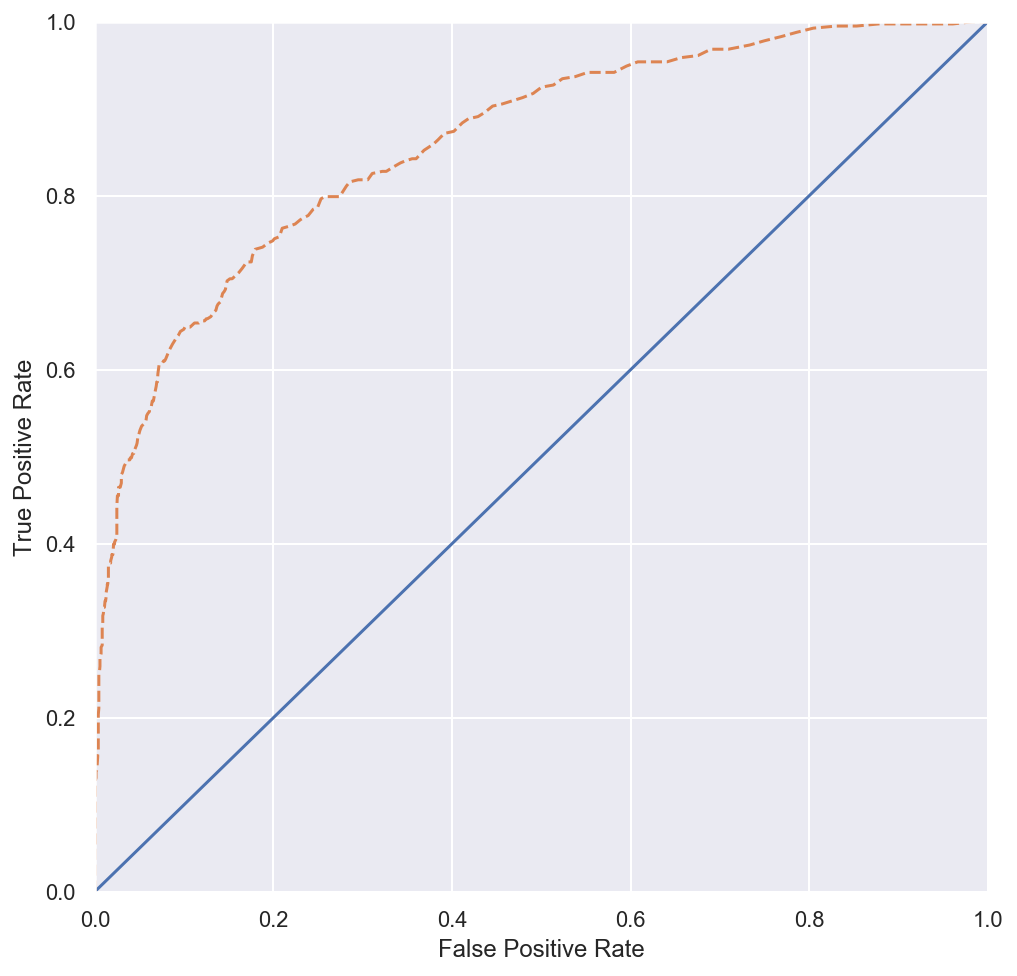

In [45]:
fpr_rf, tpr_rf, thresholds_rf = roc_curve(target_valid, proba_rf)
plt.figure(figsize=(8, 8))
plt.plot([0, 1], [0, 1])
plt.plot(fpr_rf, tpr_rf, linestyle='--')

plt.xlim([0, 1])
plt.ylim([0, 1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.show()

## 결정 트리

In [78]:
model_dt = DecisionTreeClassifier(max_depth=7)
model_dt.fit(features_train, target_train)
print(model_dt.score(features_train, target_train))
print(model_dt.score(features_valid, target_valid))

0.8721666666666666
0.8545


In [79]:
prediction = model_dt.predict(features_valid)
f1_score(target_valid, prediction)

0.5597579425113464

In [80]:
proba_dt = model_dt.predict_proba(features_valid)
proba_dt = proba_dt[:, 1]
auc_roc = roc_auc_score(target_valid, proba_dt)
print(auc_roc)

0.8486042008998659


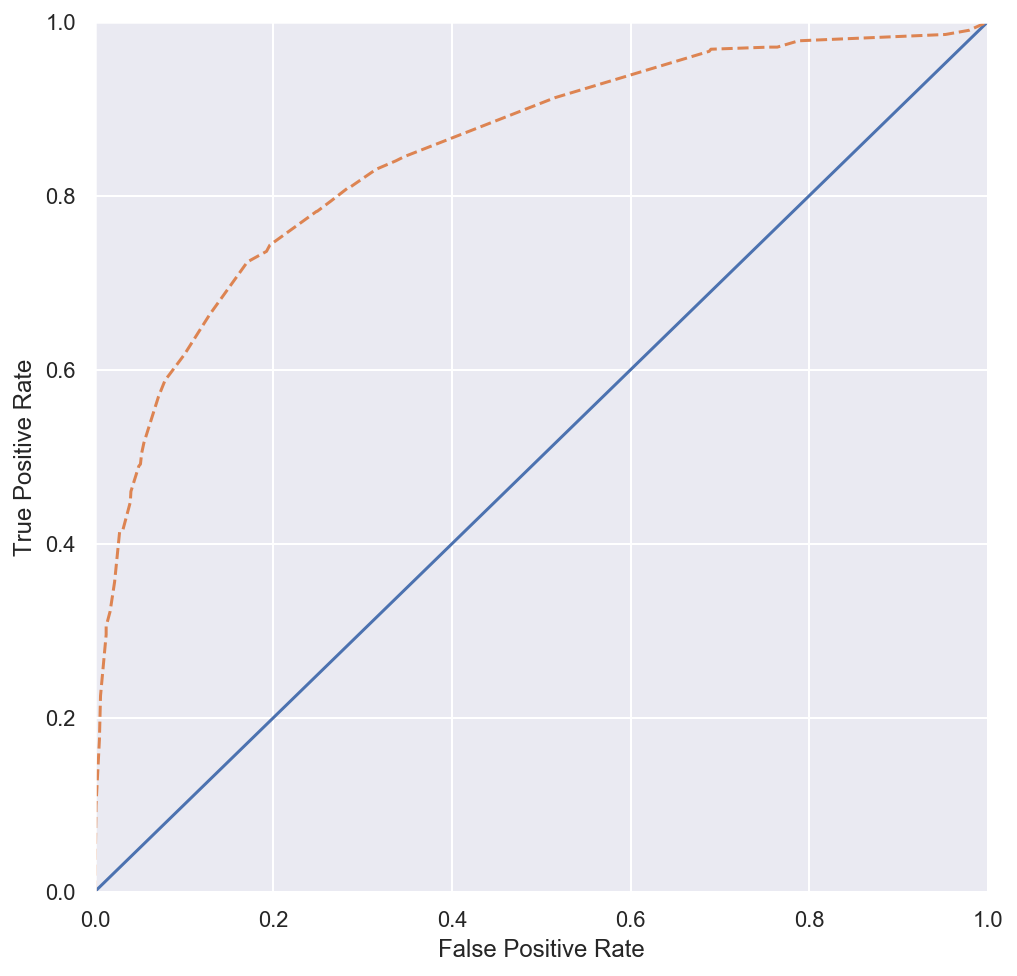

In [81]:
fpr_dt, tpr_dt, thresholds_dt = roc_curve(target_valid, proba_dt)
plt.figure(figsize=(8, 8))
plt.plot([0, 1], [0, 1])
plt.plot(fpr_dt, tpr_dt, linestyle='--')

plt.xlim([0, 1])
plt.ylim([0, 1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.show()

## KNN

In [82]:
model_knn = KNeighborsClassifier(n_neighbors=7)
model_knn.fit(features_train, target_train)
print(model_knn.score(features_train, target_train))
print(model_knn.score(features_valid, target_valid))

0.8591666666666666
0.8375


In [83]:
prediction = model_knn.predict(features_valid)
f1_score(target_valid, prediction)

0.478330658105939

In [84]:
# proba_knn = model_knn.decision_functions(features_valid)
proba_knn = model_knn.predict_proba(features_valid)
proba_knn = proba_knn[:, 1]
# auc_roc = roc_auc_score(target_valid, proba_knn)
# print(auc_roc)

In [85]:
proba_knn[100:120]

array([0.14285714, 0.14285714, 0.14285714, 0.14285714, 0.42857143,
       0.14285714, 0.42857143, 0.28571429, 0.14285714, 0.        ,
       0.42857143, 0.14285714, 0.        , 0.        , 0.14285714,
       0.28571429, 0.28571429, 0.        , 0.        , 0.14285714])

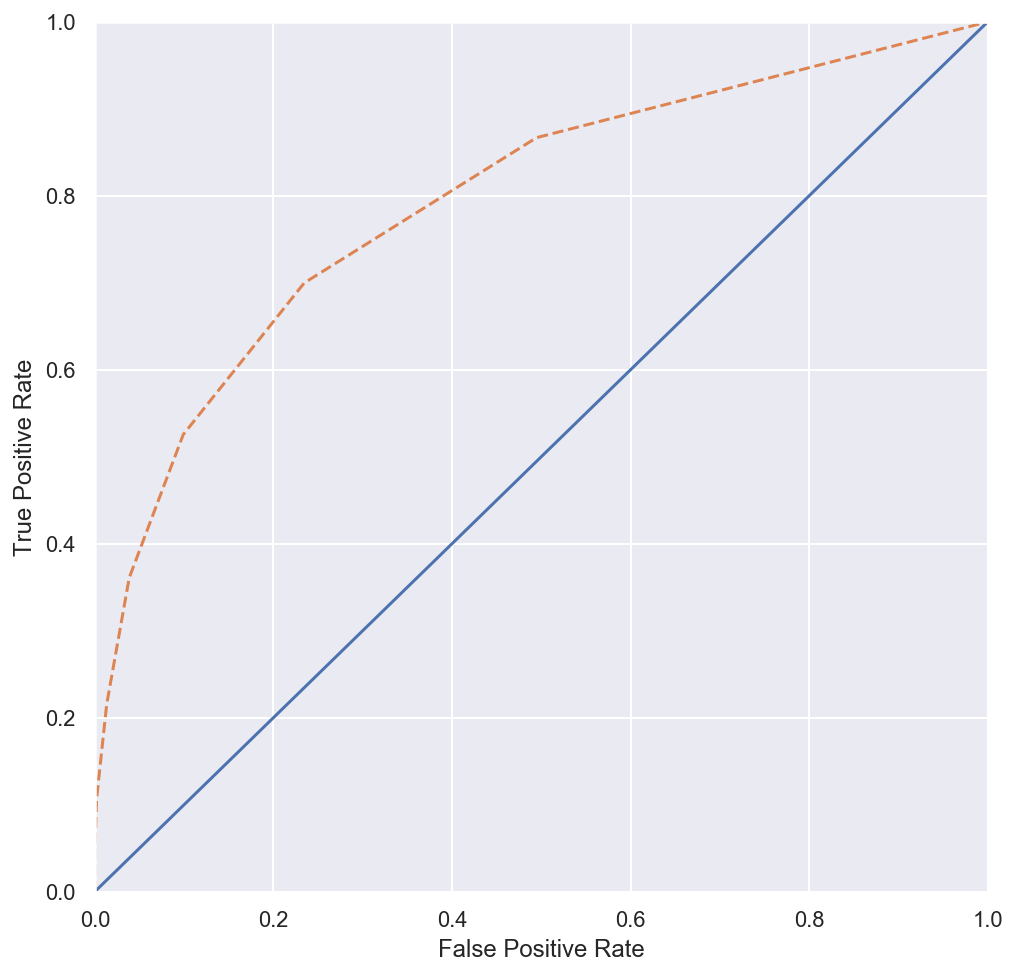

In [86]:
fpr_knn, tpr_knn, thresholds_knn = roc_curve(target_valid, proba_knn)
plt.figure(figsize=(8, 8))
plt.plot([0, 1], [0, 1])
plt.plot(fpr_knn, tpr_knn, linestyle='--')

plt.xlim([0, 1])
plt.ylim([0, 1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.show()

## 모델 성능 비교

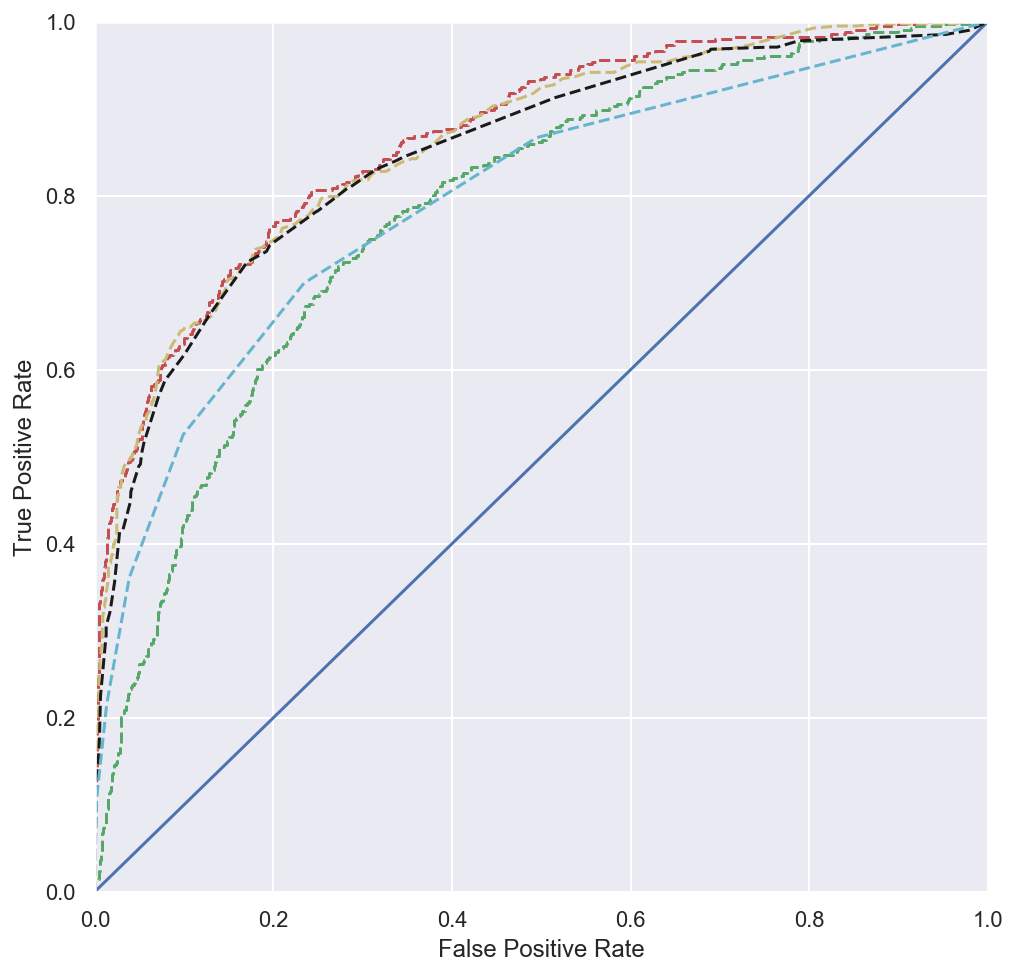

In [87]:
fpr, tpr, thresholds = roc_curve(target_valid, proba_gbc)
plt.figure(figsize=(8, 8))
plt.plot([0, 1], [0, 1])
plt.plot(fpr_gbc, tpr_gbc, linestyle='--', color='r')
plt.plot(fpr_lr, tpr_lr, linestyle='--', color='g')
plt.plot(fpr_rf, tpr_rf, linestyle='--', color='y')
plt.plot(fpr_dt, tpr_dt, linestyle='--', color='k')
plt.plot(fpr_knn, tpr_knn, linestyle='--', color='c')

plt.xlim([0, 1])
plt.ylim([0, 1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.show()